# Compare with OpenFOAM

1. Load the PKL file containing the pressure signal from LES simulation
2. Load the head values printed by OpenFOAM
2. Plot both signals (P v. time)
3. Plot their DFT (Mag v. freq)

**Note:** Converting the postProcessing folder from OpenFOAM is done with `pointFiles.sh`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, random
from os import system

In [ ]:
# Load original data (from LES surface simulation)
RAWFILE = "pickledData_constg/PTX(3).pkl"
with open(RAWFILE,'rb') as f: P_LES = pickle.load(f)

In [ ]:
# Load head probed (from filtrationFix model)
# File paths
FOLDER = "./postProcessing_constg/organizedData"
PFILE = f"{FOLDER}/p.txt"
TFILE = f"{FOLDER}/time.txt"
XFILE = f"{FOLDER}/xyz.txt"

# Load files
X = pd.read_csv(XFILE,sep=" ",names=['X','Y','Z'])
T = pd.read_csv(TFILE,delimiter=" ",header=None)
P_CFT = pd.read_csv(PFILE,delimiter=" ",header=None)

In [ ]:
P_CFT *= 9.81
P_CFT['Time'] = T
P_CFT.set_index('Time',inplace=True)
P_CFT.rename(columns=X['X'],inplace=True)

NumExpr defaulting to 8 threads.


<function matplotlib.pyplot.show(close=None, block=None)>

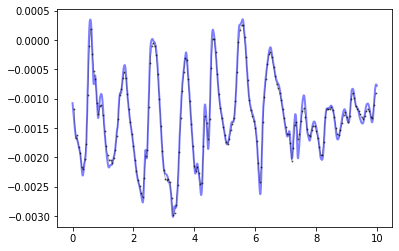

In [ ]:
#line_dict = dict(lw=1,alpha=1)
fig,ax = plt.subplots()
ax.plot(P_LES.iloc[:,20][P_LES.index < 10],\
        lw=2,alpha=0.5,c='b')
ax.plot(P_CFT.iloc[:,20][P_CFT.index < 10],\
        lw=0.5,alpha=0.5,marker='.',c='k',ms=2)
plt.show

In [8]:
# Calculate DFT
def fourierAnalysis(P):
    dT, nP = P.index[1] - P.index[0], len(P)
    fourier = pd.DataFrame({'Freq':np.fft.rfftfreq(nP,d=dT)})
    fourier.set_index("Freq",inplace=True)
    for col in P: fourier[col] = np.fft.rfft(P[col])
    return fourier

In [9]:
f1 = fourierAnalysis(P_LES)
f2 = fourierAnalysis(P_CFT)

<function matplotlib.pyplot.show(close=None, block=None)>

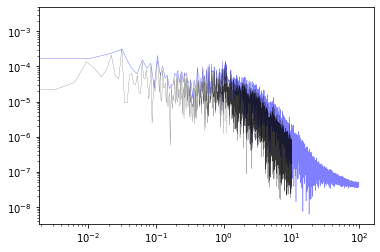

In [11]:
fig,ax = plt.subplots()
ax.plot(f1.index,np.absolute(f1.iloc[:,0])/len(P_LES),\
        lw=0.5,alpha=0.5,c='b',zorder=1)
ax.plot(f2.index,np.absolute(f2.iloc[:,0])/len(P_CFT),\
        lw=0.2,alpha=0.8,c='k',zorder=2)
ax.set(yscale='log',xscale='log')
plt.show

<AxesSubplot:>

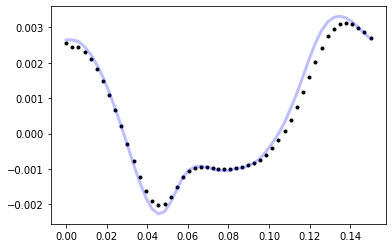

In [12]:
P_CFT.mean().plot(marker='.',lw=0,c='k')
P_LES.mean().plot(lw=3,alpha=0.25,c='b')

<AxesSubplot:>

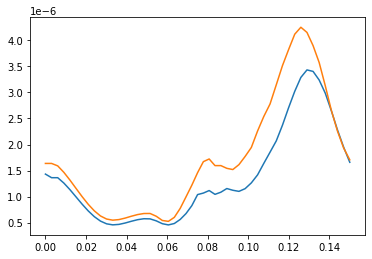

In [13]:
P_CFT.var().plot()
P_LES.var().plot()

In [14]:
for i,j in zip(list(P_CFT.columns),list(P_LES.columns)): 
    print("{:.6f},{:.6f}".format(i,j))

0.000000,0.000000
0.003037,0.003037
0.006063,0.006063
0.009080,0.009080
0.012089,0.012089
0.015093,0.015093
0.018095,0.018095
0.021099,0.021099
0.024108,0.024108
0.027124,0.027124
0.030149,0.030149
0.033186,0.033186
0.036235,0.036235
0.039296,0.039296
0.042366,0.042366
0.045443,0.045443
0.048519,0.048519
0.051586,0.051586
0.054627,0.054627
0.057633,0.057633
0.060599,0.060599
0.063529,0.063529
0.066426,0.066426
0.069298,0.069298
0.072154,0.072154
0.075000,0.075000
0.077846,0.077846
0.080702,0.080702
0.083574,0.083574
0.086471,0.086471
0.089401,0.089401
0.092367,0.092367
0.095372,0.095372
0.098414,0.098414
0.101481,0.101481
0.104557,0.104557
0.107634,0.107634
0.110704,0.110704
0.113765,0.113765
0.116814,0.116814
0.119851,0.119851
0.122876,0.122876
0.125892,0.125892
0.128901,0.128901
0.131905,0.131905
0.134907,0.134907
0.137911,0.137911
0.140920,0.140920
0.143937,0.143937
0.146963,0.146963
0.150000,0.150000


In [13]:
len(P_LES.columns)

51